# Worksheet 4

In [1]:
%matplotlib inline

# Questions

## Question 1

Convert the ODE

$$
  y''' + x y'' + 3 y' + y = e^{−x}
$$

into a first order system of ODEs.

## Question 2

Show by Taylor expansion that the backwards differencing estimate of $f(x)$,

$$
  f(x) = \frac{f(x) − f(x − h)}{h}
$$

is first order accurate.

## Question 3

Use Taylor expansion to derive a symmetric or central difference estimate of $f^{(4)}(x)$ on a grid with spacing $h$.

## Question 4

State the convergence rate of Euler's method and the Euler predictor-corrector method.

## Question 5

Explain when multistage methods such as Runge-Kutta methods are useful.

## Question 6

Explain the power method for finding the largest eigenvalue of a matrix. In particular, explain why it is simpler to find the absolute value, and how to find the phase information.

## Coding Question 1

Apply Euler's method to the ODE

$$
  y' + 2y = 2 − e^{−4 x}, \qquad y(0) = 1.
$$

Find the value of $y(1)$ (analytic answer is $1 − (e^{−2} − e^{−4})/2$) and see how your method converges with resolution.

## Coding Question 2

Apply the standard RK4 method to the above system, again checking that it converges with resolution.

## Coding Question 3

Write a code using the power method and inverse power method to compute the largest and smallest eigenvalues of an arbitrary matrix. Apply it to a random $n = 3$ matrix, checking that the correct answer is found. How does the number of iterations required for convergence to a given level vary with the size of the matrix?

# Answers

## Question 1

Convert the ODE

$$
  y''' + x y'' + 3 y' + y = e^{−x}
$$

into a first order system of ODEs.

### Answer Question 1

Step by step we introduce

$$
\begin{aligned}
  u &= y' \\
  v &= u' \\
    &= y''.
\end{aligned}
$$

We can therefore write the ODE into a system of ODEs. The first order ODEs for $y$ and $u$ are given by the definitions above. The ODE for $v$ is given from the original equation, substituting in the definition of $u$ where appropriate, to get

$$
\begin{aligned}
  \begin{pmatrix} y \\ u \\ v \end{pmatrix}' & = \begin{pmatrix} u \\ v \\ e^{-x} - x y'' - 3 y' - y \end{pmatrix} \\
  & = \begin{pmatrix} u \\ v \\ e^{-x} - x v - 3 u - y \end{pmatrix}.
\end{aligned}
$$

## Question 2

Show by Taylor expansion that the backwards differencing estimate of $f(x)$,

$$
  f(x) = \frac{f(x) − f(x − h)}{h}
$$

is first order accurate.

### Answer Question 2

We have the Taylor series expansion of $f(x − h)$ about $x$ is

$$
  f(x − h) = f(x) − h f'(x) + \frac{h^2}{2!} f''(x) + {\mathcal O} (h^3).
$$

Substituting this in to the backwards difference formula we find

\begin{align}
  \frac{f(x) - f(x - h)}{h} & = \frac{f(x) - f(x) + h f'(x) + \frac{h^2}{2!} f''(x) + {\mathcal O} (h^3)}{h} \\
  & = f'(x) + {\mathcal O} (h)
\end{align}

Therefore the difference between the exact derivative $f'$ and the backwards difference estimate is $\propto h$ and hence the finite difference estimate is first order accurate.

## Question 3

Use Taylor expansion to derive a symmetric or central difference estimate of $f^{(4)}(x)$ on a grid with spacing $h$.

### Answer Question 3

For this we need the Taylor expansions

\begin{align*}
    f(x + h) & = f(x) + h f^{(1)}(x) + \frac{h^2}{2!} f^{(2)}(x) +
    \frac{h^3}{3!} f^{(3)}(x) + \frac{h^4}{4!} f^{(4)}(x) +
    \frac{h^5}{5!} f^{(5)}(x) + \dots \\
    f(x - h) & = f(x) - h f^{(1)}(x) + \frac{h^2}{2!} f^{(2)}(x) -
    \frac{h^3}{3!} f^{(3)}(x) + \frac{h^4}{4!} f^{(4)}(x) -
    \frac{h^5}{5!} f^{(5)}(x) + \dots \\
    f(x + 2 h) & = f(x) + 2 h f^{(1)}(x) + \frac{4 h^2}{2!} f^{(2)}(x) +
    \frac{8 h^3}{3!} f^{(3)}(x) + \frac{16 h^4}{4!} f^{(4)}(x) +
    \frac{32 h^5}{5!} f^{(5)}(x) + \dots \\
    f(x - 2 h) & = f(x) - 2 h f^{(1)}(x) + \frac{4 h^2}{2!} f^{(2)}(x) -
    \frac{8 h^3}{3!} f^{(3)}(x) + \frac{16 h^4}{4!} f^{(4)}(x) -
    \frac{32 h^5}{5!} f^{(5)}(x) + \dots 
\end{align*}

By a central or symmetric difference estimate we mean that the coefficient of $f(x \pm n h)$ should have the same magnitude. By comparison with central difference estimates for first and second derivatives we see that for odd order derivatives the coefficients should have opposite signs and for even order the same sign.

So we write our estimate as

\begin{equation*}
    f^{(4)}(x) \simeq A f(x) + B \left( f(x + h) + f(x - h) \right)
    + C \left( f(x + 2 h) +  f(x - 2 h) \right)
\end{equation*}

and we then need to constrain the coefficients $A, B, C$. By looking at terms proportional to $h^s$ we see

\begin{align*}
    h^0: && 0 & = A + 2 B + 2 C \\
    h^1: && 0 & = 0 \\
    h^2: && 0 & = B + 4 C \\
    h^3: && 0 & = 0 \\
    h^4: && \frac{1}{h^4} & = \frac{B}{12} + \frac{16 C}{12}. 
\end{align*}

This gives three constraints on our three unknowns so we cannot go to higher order. Solving the equations gives

\begin{equation*}
    A = \frac{6}{h^4}, \qquad B = -\frac{4}{h^4}, \qquad C =
    \frac{1}{h^4}.
\end{equation*}

Writing it out in obvious notation we have

\begin{equation*}
    f_1^{(4)} = \frac{1}{h^4} \left( 6 f_i - 4 (f_{i+1} + f_{i-1}) +
      (f_{i+2} + f_{i-2}) \right).
\end{equation*}

## Question 4

State the convergence rate of Euler's method and the Euler predictor-corrector method.

### Answer Question 4

Euler's method converges as $h$ and the predictor-corrector method as $h^2$.

## Question 5

Explain when multistage methods such as Runge-Kutta methods are useful.

### Answer Question 5

Multistage methods require only one vector of initial data, which must be provided to completely specify the IVP; that is, the method is self-starting. It is also easy to adapt a multistage method to use variable step sizes; that is, to make the algorithm adaptive depending on local error estimates in order to keep the global error within some tolerance. Finally, it is relatively easy to theoretically show convergence. Combining this we see that multistage methods are useful as generic workhorse algorithms and in cases where the function defining the IVP may vary widely in behaviour, so that adaptive algorithms are required.

## Question 6

Explain the power method for finding the largest eigenvalue of a matrix. In particular, explain why it is simpler to find the absolute value, and how to find the phase information.

### Answer Question 6

The idea behind the power method is that most easily seen by writing out a generic vector ${\bf x}$ in terms of the eigenvectors of the matrix $A$ whose eigenvalues we wish to find,

$$
  {\bf x} = \sum_{i=1}^N a_i {\bf e}_i,
$$

where we assume that the eigenvectors are ordered such that the associated eigenvalues have the order $|\lambda_1 | > |\lambda_2 | \ge |\lambda_3 | \ge \dots \ge |\lambda_N |$. Note that we always assume that there is a unique eigenvalue $\lambda_1$ with largest magnitude.

We then note that multiplying this generic vector by the matrix $A$ a number of times gives

$$
  A^k {\bf x} = \lambda_1^k \sum_{i=1}^N a_i \left( \frac{\lambda_i}{\lambda_1} \right)^k {\bf e}_i.
$$

We then note that, for $i = 1$, the ratio of the eigenvalues $(\lambda_i / \lambda_1)^k$ must tend to zero as $k \to \infty$. Therefore in the limit we will "pick out" $\lambda_1$.

Of course, to actually get the eigenvalue itself we have to essentially divide two vectors. That is, we define a sequence $x^{(k)}$ where the initial value $x^{(0)}$ is arbitrary and at each step we multiply by $A$, so that

$$
  x^{(k)} = A^k x^{(0)}.
$$

It follows that we can straightforwardly get $\lambda_1$ by looking at "the ratio of successive iterations". E.g.,

$$
  \lim_{k \to \infty} \frac{ \| {\bf x}_{k+1} \| }{ \| {\bf x}_k \| } = | \lambda_1 |.
$$

This only gives information about the magnitude as we have used the simplest way of getting from a vector to a real number, the absolute value. To retain information about the phase we need to replace the absolute value of the vectors with some linear functional such as the sum of the coefficients.

## Coding Question 1

Apply Euler's method to the ODE

$$
  y' + 2y = 2 − e^{−4 x}, \qquad y(0) = 1.
$$

Find the value of $y(1)$ (analytic answer is $1 − (e^{−2} − e^{−4})/2$) and see how your method converges with resolution.

### Answer Coding Question 1

Error at the end point is  [-0.00099074]


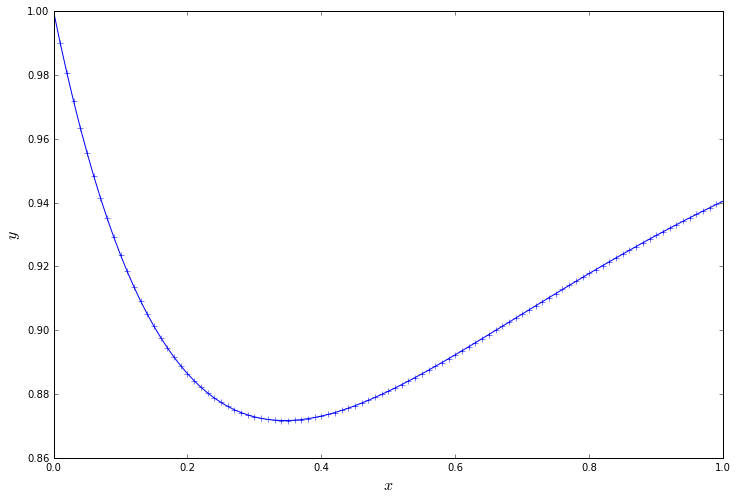

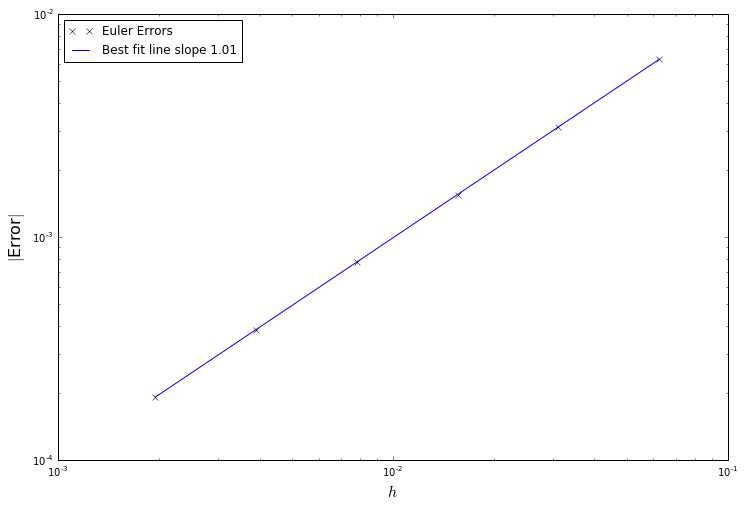

In [2]:
import numpy
from matplotlib import pyplot
from scipy import linalg

def euler(f, y0, interval, N = 100):
    """
    Solve the IVP y' = f(x, y) on the given interval using N+1 points,
    (counting the initial point) with initial data y0.
    """
    
    h = (interval[1] - interval[0]) / N
    x = numpy.linspace(interval[0], interval[1], N+1)
    y = numpy.zeros((len(y0), N+1))
    y[:, 0] = y0
    
    for i in range(N):
        y[:, i+1] = y[:, i] + h * f(x[i], y[:, i])
    
    return x, y

def fn_q1(x, y):
    """
    Function defining the IVP in question 1.
    """
    
    return 2.0 - numpy.exp(-4.0*x) - 2.0*y

# Now do the test

exact_y_end = 1.0 - (numpy.exp(-2.0) - numpy.exp(-4.0)) / 2.0

# Test at default resolution
x, y = euler(fn_q1, numpy.array([1.0]), [0.0, 1.0])
print("Error at the end point is ", y[:, -1] - exact_y_end)

fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.plot(x, y[0, :], 'b-+')
pyplot.xlabel('$x$', size = 16)
pyplot.ylabel('$y$', size = 16)

# Now do the convergence test

levels = numpy.array(range(4, 10))
Npoints = 2**levels
abs_err = numpy.zeros(len(Npoints))
for i in range(len(Npoints)):
    x, y = euler(fn_q1, numpy.array([1.0]), [0.0, 1.0], Npoints[i])
    abs_err[i] = abs(y[0, -1] - exact_y_end)

# Best fit to the errors
h = 1.0 / Npoints
p = numpy.polyfit(numpy.log(h), numpy.log(abs_err), 1)
    
fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.loglog(h, abs_err, 'kx')
pyplot.loglog(h, numpy.exp(p[1]) * h**(p[0]), 'b-')
pyplot.xlabel('$h$', size = 16)
pyplot.ylabel('$|$Error$|$', size = 16)
pyplot.legend(('Euler Errors', "Best fit line slope {:.3}".format(p[0])),
              loc = "upper left")

pyplot.show()

## Coding Question 2

Apply the standard RK4 method to the above system, again checking that it converges with resolution.

### Answer Coding Question 2

Error at the end point is  [  1.09143472e-10]


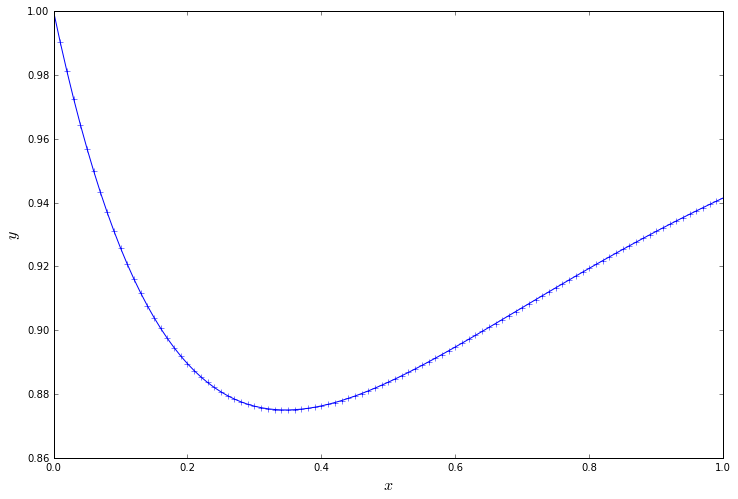

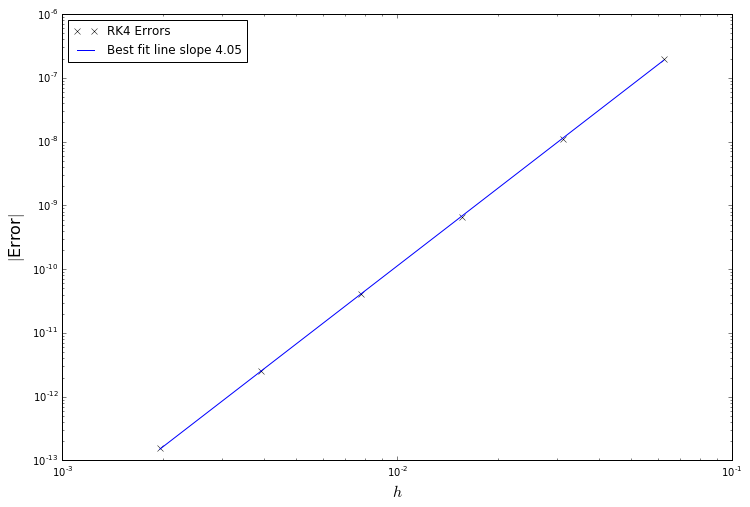

In [3]:
def RK4(f, y0, interval, N = 100):
    """
    Solve the IVP y' = f(x, y) on the given interval using N+1 points
    (counting the initial point) with initial data y0.
    """
    
    h = (interval[1] - interval[0]) / N
    x = numpy.linspace(interval[0], interval[1], N+1)
    y = numpy.zeros((len(y0), N+1))
    y[:, 0] = y0
    
    for i in range(N):
        k1 = h * f(x[i]          , y[:, i])
        k2 = h * f(x[i] + h / 2.0, y[:, i] + k1 / 2.0)
        k3 = h * f(x[i] + h / 2.0, y[:, i] + k2 / 2.0)
        k4 = h * f(x[i] + h      , y[:, i] + k3)
        y[:, i+1] = y[:, i] + (k1 + k4 + 2.0 * (k2 + k3)) / 6.0
    
    return x, y

def fn_q2(x, y):
    """
    Function defining the IVP in question 2.
    """
    
    return 2.0 - numpy.exp(-4.0*x) - 2.0*y

# Now do the test

exact_y_end = 1.0 - (numpy.exp(-2.0) - numpy.exp(-4.0)) / 2.0

# Test at default resolution
x, y = RK4(fn_q1, numpy.array([1.0]), [0.0, 1.0])
print("Error at the end point is ", y[:, -1] - exact_y_end)

fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.plot(x, y[0, :], 'b-+')
pyplot.xlabel('$x$', size = 16)
pyplot.ylabel('$y$', size = 16)

# Now do the convergence test

levels = numpy.array(range(4, 10))
Npoints = 2**levels
abs_err = numpy.zeros(len(Npoints))
for i in range(len(Npoints)):
    x, y = RK4(fn_q1, numpy.array([1.0]), [0.0, 1.0], Npoints[i])
    abs_err[i] = abs(y[0, -1] - exact_y_end)

# Best fit to the errors
h = 1.0 / Npoints
p = numpy.polyfit(numpy.log(h), numpy.log(abs_err), 1)

fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.loglog(h, abs_err, 'kx')
pyplot.loglog(h, numpy.exp(p[1]) * h**(p[0]), 'b-')
pyplot.xlabel('$h$', size = 16)
pyplot.ylabel('$|$Error$|$', size = 16)
pyplot.legend(('RK4 Errors', "Best fit line slope {0:.3}".format(p[0])),
              loc = "upper left")

pyplot.show()

## Coding Question 3

Write a code using the power method and inverse power method to compute the largest and smallest eigenvalues of an arbitrary matrix. Apply it to a random $n = 3$ matrix, checking that the correct answer is found. How does the number of iterations required for convergence to a given level vary with the size of the matrix?

### Answer Coding Question 3

Computed maximum and minimum eigenvalues are 1.49145412239 0.334341080412
True eigenvalues are [ 1.49145412+0.j          0.42248744+0.10938505j  0.42248744-0.10938505j]


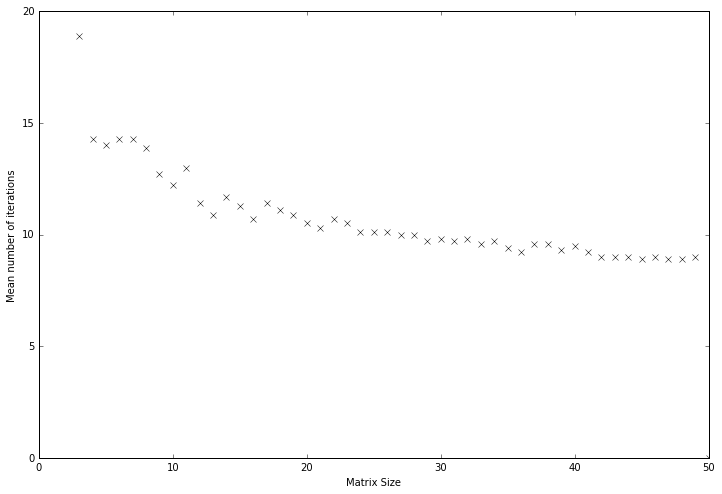

In [4]:
def PowerMethod(A, tolerance = 1e-10, MaxSteps = 100):
    """
    Apply the power method to the matrix A to find the
    largest eigenvalue in magnitude.
    """
    
    n = numpy.size(A, 0)
    # Simple initial value
    x = numpy.ones(n)
    x /= linalg.norm(x)
    ratio = 1.0
    for k in range(MaxSteps):
        ratio_old = ratio
        x_old = x.copy()
        x = numpy.dot(A, x)
        ratio = numpy.sum(x) / numpy.sum(x_old)
        x /= linalg.norm(x)
        if (abs(ratio - ratio_old) < tolerance):
            break
    
    return ratio, k

def InversePowerMethod(A, tolerance = 1e-10, MaxSteps = 100):
    """
    Apply the inverse power method to the matrix A to find the
    smallest eigenvalue in magnitude.
    """
    
    n = numpy.size(A, 0)
    # Simple initial value
    x = numpy.ones(n)
    x /= linalg.norm(x)
    ratio = 1.0
    for k in range(MaxSteps):
        ratio_old = ratio
        x_old = x.copy()
        x = linalg.solve(A, x)
        ratio = numpy.sum(x) / numpy.sum(x_old)
        x /= linalg.norm(x)
        if (abs(ratio - ratio_old) < tolerance):
            break
    
    return 1.0/ratio, k

# Test on a random 3x3 matrix

A = numpy.random.rand(3,3)
max_lambda, iterations_max = PowerMethod(A)
min_lambda, iterations_min = InversePowerMethod(A)
eigenvalues, eigenvectors = linalg.eig(A)
print("Computed maximum and minimum eigenvalues are",
      max_lambda, min_lambda)
print("True eigenvalues are", eigenvalues)

# Now check how the number of iterations depends on the matrix size.
# As we are computing random matrices, do average of 10 attempts
MinMatrixSize = 3
MaxMatrixSize = 50
Attempts = 10
iterations = numpy.zeros((MaxMatrixSize - MinMatrixSize + 1, Attempts))
for n in range(MinMatrixSize, MaxMatrixSize):
    for a in range(Attempts):
        A = numpy.random.rand(n, n)
        ratio, iterations[n - MinMatrixSize, a] = PowerMethod(A)

ii = numpy.mean(iterations, 1)
nn = numpy.array(range(MinMatrixSize, MaxMatrixSize))
fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.plot(range(MinMatrixSize, MaxMatrixSize+1),
            numpy.mean(iterations, 1), 'kx')
pyplot.xlabel('Matrix Size')
pyplot.ylabel('Mean number of iterations')

pyplot.show()

We see that the number of iterations is practically unchanged with the size of the matrix.